# Histogramming and plotting

### Histograms mean different things in different contexts
- counts, bin edges - useful for a bar plot - `np.histogram` / `plt.bar`
- counts, bin edges, pre computed errors - `TGraphErrors`/`plt.errorbar`
- weighted values, weights squared, bin_edges - proper error calculation `TH1`/`Coffea.hist`/`hist`

## UHI - [Unified Histogram Interface](https://uhi.readthedocs.io/en/latest/plotting.html#using-the-protocol)
- (Plottable) Histogram protocol - designed to make libraries interoperable, easy to navigate
  - Conformed to by `hits`, `mplhep`, `uproot4`, `histoprint`
- Each UHI histogram has the following methods
  - `h.values()`: The value (as given by the kind)
  - `h.variances()`: The variance in the value (None if an unweighed histogram was filled with weights)
  - `h.counts()`: How many fills the bin received or the effective number of fills if the histogram is weighted
  - `h.axes`: A Sequence of axes
  - and a few other properties

## [hist](https://github.com/scikit-hep/hist)
- python go to one-stop for histogramming
- extends [boost-histogram](https://github.com/scikit-hep/boost-histogram.html) (pythonic wrapper for C++ library - *FAST*)
  - makes it user friendly
- shortcuts for convenience - plotting/fitting

## [mplhep](https://github.com/scikit-hep/mplhep)
- build on top of `matplotlib`
- extends functionality to easily plot histograms from various inputs
- holds style sheets for easy experiment specific style application

# Basics

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Numpy histogram
H = np.histogram(np.random.normal(5, 1, 1000), np.linspace(0, 10, 11))
h, bins = H
h

array([  0,   0,  29, 140, 345, 339, 129,  18,   0,   0])

Text(0.5, 1.0, 'Now native histogram `stairs` plot')

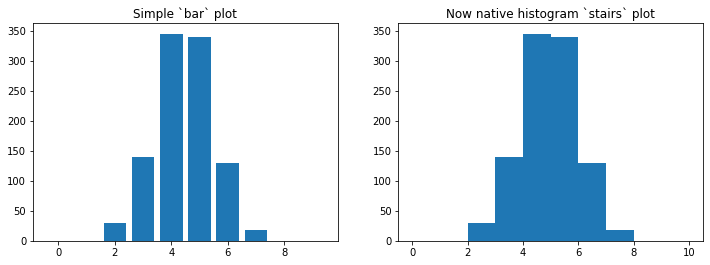

In [3]:
# Visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].bar(range(len(h)), h)
axs[0].set_title('Simple `bar` plot')
axs[1].stairs(h, bins, fill=True)
axs[1].set_title('Now native histogram `stairs` plot')

# Extending plotting with `mplhep`
- primary goal is to stay unobtrusive, if it works in `matplotlib`, it should work in `mplhep`

NameError: name 'H' is not defined

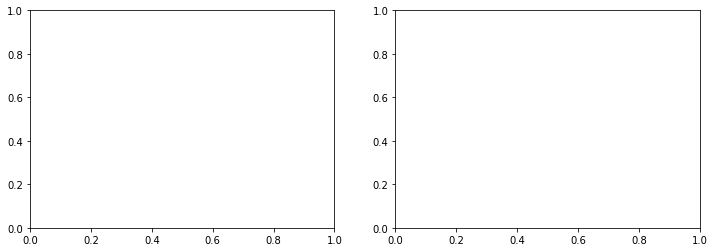

In [26]:
import mplhep as hep
f, axs = plt.subplots(1,2, figsize=(12, 4))

hep.histplot(H, ax=axs[0])
hep.histplot(h, bins, yerr=True, ax=axs[1]);

### kwargs are passed though to `matplotlib`

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

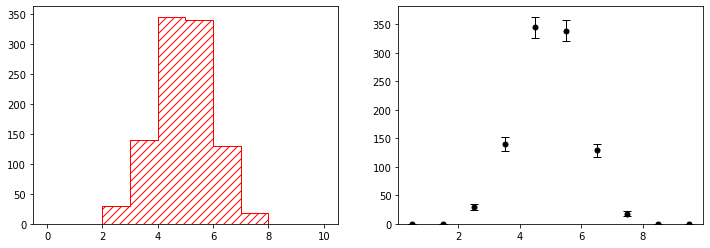

In [5]:
f, axs = plt.subplots(1,2, figsize=(12, 4))

hep.histplot(H, ax=axs[0], histtype='fill', hatch='///', edgecolor='red', facecolor='none')
hep.histplot(H, ax=axs[1], histtype='errorbar', yerr=True, c='black', capsize=4)

### Stacking, norming is available

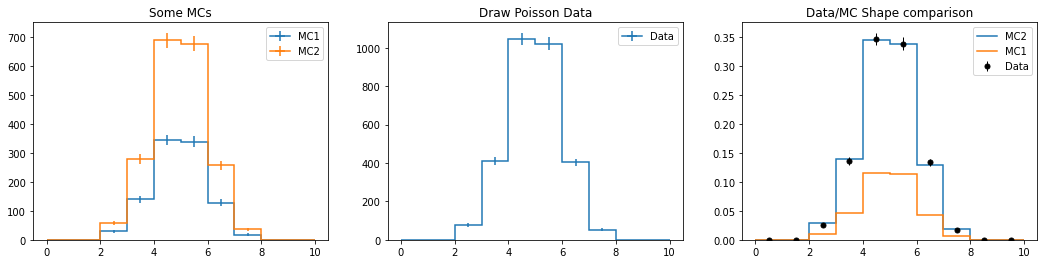

In [6]:
f, axs = plt.subplots(1,3, figsize=(18, 4))

data = np.random.poisson(h*3)
hep.histplot([h, h*2], bins=bins, ax=axs[0], yerr=True, label=["MC1", "MC2"])
hep.histplot(data, bins=bins, ax=axs[1], yerr=True, label="Data")

hep.histplot([h, h*2], bins=bins, ax=axs[2], stack=True, label=["MC1", "MC2"], density=True)
hep.histplot(data, bins=bins, ax=axs[2], yerr=True, histtype='errorbar', label="Data", density=True, color='k')
for ax in axs:
    ax.legend()
axs[0].set_title("Some MCs")
axs[1].set_title("Draw Poisson Data")
axs[2].set_title("Data/MC Shape comparison"); 

### Convenient sorting options

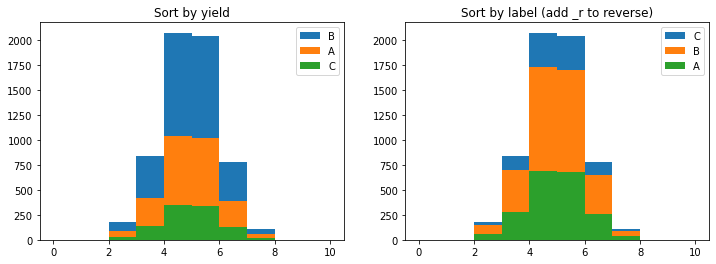

In [7]:
f, axs = plt.subplots(1,2, figsize=(12, 4))
hep.histplot([h*2, h*3, h], bins=bins, ax=axs[0], stack=True, histtype='fill', label=["A", "B", "C"], sort='yield');
hep.histplot([h*2, h*3, h], bins=bins, ax=axs[1], stack=True, histtype='fill', label=["A", "B", "C"], sort='label_r');
for ax in axs:
    ax.legend()
axs[0].set_title("Sort by yield")
axs[1].set_title("Sort by label (add _r to reverse)");

### Can pass either pre-computed error bars or `fcn(weight, weights2)`

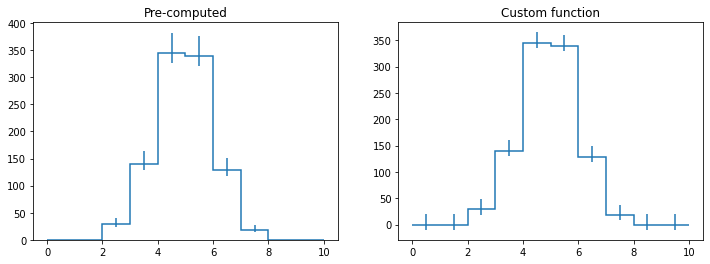

In [8]:
def err(w, w2):
    return w - 10, w2 + 20

f, axs = plt.subplots(1,2, figsize=(12, 4))
hep.histplot(h, bins=bins, yerr=[np.sqrt(h), np.sqrt(h)*2], ax=axs[0]);
hep.histplot(h, bins, w2=h, w2method=err, ax=axs[1]);

axs[0].set_title("Pre-computed")
axs[1].set_title("Custom function");

### Inputs types are flexible
- already shown `np.array`, `List[np.array]`, `np.ndarray`
- will show `hist.Hist` / `List[hist.Hist]`
- but also *anything* that is PlottableProtocol compatible

['hpx;1', 'hpxpy;1', 'hprof;1', 'ntuple;1']
<TH1F (version 1) at 0x7f96c6d4f9e8>


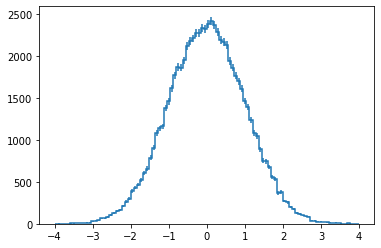

In [9]:
## Uproot TH1 
import uproot4
from skhep_testdata import data_path
fname = data_path("uproot-hepdata-example.root")
f = uproot4.open(fname)
print(f.keys())
print(f['hpx'])
hep.histplot(f['hpx']);

Welcome to JupyROOT 6.18/04


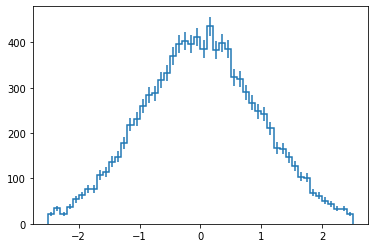

In [10]:
# PyROOT TH1
import ROOT
h = ROOT.TH1F("h1", "h1", 50, -2.5, 2.5)
h.FillRandom("gaus", 10000)

hep.histplot(h);

# hist - basics
- easy histogram handling - filling, slicing, (merging, serializing)
- Nice repr, interfaces to `mplhep` for plotting

In [11]:
import hist
# from hist import Hist

In [12]:
# Creating a histogram object
h = hist.new.Reg(10, 0, 10).Double()
h

Hist(Regular(10, 0, 10, label='Axis 0'), storage=Double())

In [13]:
# Equivalent to 
h = hist.Hist(
    hist.axis.Regular(
        10, 0, 10, 
        # Optionally include name/label, whether to keep flow bins
        name="x", label="Fancy display name", underflow=False, 
        )
    )   
h

Hist(Regular(10, 0, 10, underflow=False, name='x', label='Fancy display name'), storage=Double())

In [14]:
# Fill it
h.fill(np.random.normal(5, 1, 1000))
h

Hist(Regular(10, 0, 10, underflow=False, name='x', label='Fancy display name'), storage=Double()) # Sum: 1000.0

In [15]:
# Print it (to CLI)
h.show(columns=50)

 0.00e+00 _                             3.57e+02 ╷
 1.00e+00 _
 2.00e+00 _
 3.00e+00 _██
 4.00e+00 _██████████████
 5.00e+00 _█████████████████████████████████
 6.00e+00 _███████████████████████████████████████
 7.00e+00 _███████████████
 8.00e+00 _██
 9.00e+00 _
 1.00e+01 _


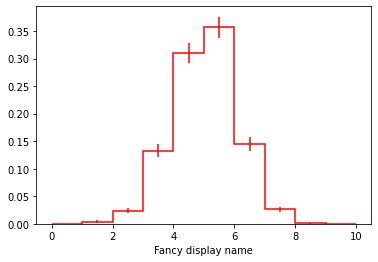

In [16]:
# Plot it
h.plot(color='red', density=True);

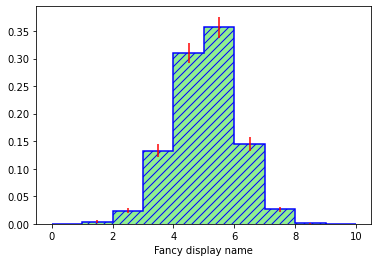

In [17]:
# Access and modify artists
art = h.plot(color='red', density=True);
plt.setp(art[0].stairs, edgecolor='blue', fill=True, facecolor='lightgreen', hatch='///');

### hist - basic operations

In [18]:
# Slicing
h[2:4]

Hist(Regular(2, 2, 4, underflow=False, name='x', label='Fancy display name'), storage=Double()) # Sum: 157.0 (996.0 with flow)

In [19]:
# Slicing in data coordinates
h[1j:6j]

Hist(Regular(5, 1, 6, underflow=False, name='x', label='Fancy display name'), storage=Double()) # Sum: 828.0 (1000.0 with flow)

In [20]:
# Get total
h.sum()

1000.0

### hist - properties (PlottableHistogram)

In [21]:
print(h.values())
print(h.variances())
print(h.axes[0])
print(h.axes[0].centers)

[  0.   4.  24. 133. 310. 357. 145.  26.   1.   0.]
[  0.   4.  24. 133. 310. 357. 145.  26.   1.   0.]
Regular(10, 0, 10, underflow=False, name='x', label='Fancy display name')
[0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5]


## hist - multiple dimensions and indexing
- analysis like example

In [10]:
# Create a new hist
h2d = hist.new.Reg(10, 0, 10, name='x').StrCat(["A", "B"], growth=True, name='dataset').Weight()
h2d

Hist(
  Regular(10, 0, 10, name='x', label='x'),
  StrCategory(['A', 'B'], growth=True, name='dataset', label='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [11]:
# Fill it
h2d.fill(np.random.normal(3, 1, 1000), "A")
h2d.fill(np.random.normal(5, 1, 3000), "B")
h2d.fill(np.random.normal(7, 1, 2000), "C")
h2d

Hist(
  Regular(10, 0, 10, name='x', label='x'),
  StrCategory(['A', 'B', 'C'], growth=True, name='dataset', label='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=5996, variance=5996) (WeightedSum(value=6000, variance=6000) with flow)

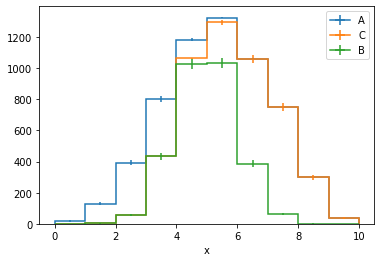

In [24]:
h2d.plot(stack=True, histtype='step', sort='y_r');
plt.legend()

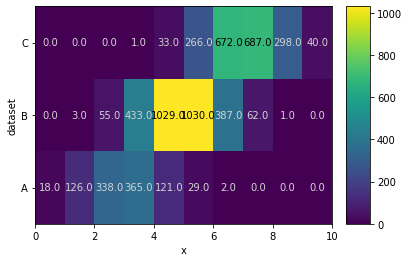

In [32]:
hep.hist2dplot(h2d, labels=True);

# Styling with mplhep
- Primary purpose of `mplhep` is to serve and distribute styles 
    - **ALICE**
    - **ATLAS**
    - **CMS**
    - **LHCb**
- To ensure plots looks the same on any framework fonts need to be included
 - I am liable to go on a rant, so suffice to say:
 - We package an open look-alike of Helvetica called Tex Gyre Heros

In [ ]:
hep.style.use([hep.style.ATLAS, {'figure.figsize': (6, 4)}])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)));
hep.atlas.label();

In [ ]:
hep.style.use()
fig, axs = plt.subplots(1, 5, figsize=(18, 3))
for i, ax in enumerate(axs):
    hep.cms.label(ax=ax, loc=i)